# Фильтрация сигнала

Фильтрация временного ряда означает удаление спектральной мощности на некоторых выбранных частотах при сохранении других частот.

Фильтр верхних частот сохраняет более высокие частоты, удаляя низкие частоты; 

фильтр нижних частот делает обратное.


Полосовой фильтр удаляет все частоты за пределами заданной полосы.


Фильтры широко используются для цифровой обработки сигналов (DSP, digital signal processing), а также анализа временных рядов. 

В приложениях DSP фильтры должны быть очень эффективными, и они часто должны быть причинно-следственными (полагаться только на предыдущие выборки данных, чтобы выполнять фильтрацию в реальном времени).

В модели 

$y_t=\sum_{j=-\infty}^\infty \beta_j x_{t-j}$

значения ${β_j}$ называются линейным фильтром.

Значения $y_t$ это линейная функция от оригинального и отфильтрованного набора $x_t$. Линейная фильтрация, где $β_j$ известно, часто используется для определения каких либо паттернов и сигналов в зашумленном временном ряду $x_t$.

Фильтрация включает в себя свертку двух рядов $x_t$ и $β_j$. Свернутый ряд (результат свертки) $y_t$
Свертка представляет собой скалярное произведение векторов. При этом по $β_j$ идем в прямом направлении, а по $x_t$ - в обратном.
$
\begin{array}{ccccccccc}
\cdots & x_{t+3}, & x_{t+2}, & x_{t+1}, & x_t, & x_{t-1}, & x_{t-2}, & x_{t-3} & \cdots\\
& \times & \times & \times & \times & \times & \times& \times & \\
\cdots & \beta_{-3}, & \beta_{-2}, &\beta_{-1}, & \beta_{0}, & \beta_{1}, & \beta_{2}, & \beta_{3} & \cdots\\
\end{array}
$

Мы будем полагать, что 

$
\sum_{j=-\infty}^\infty
|\beta_j| < \infty
$


## Фильтрация Фурье

Самый очевидный фильтр просто использует определение фильтрации. 

Если временной ряд очень длинный, сократите его. Если коротки -  дополните нулями до эффективной длины. При необходимости удалите тренд или иным образом предобработайте его. 

Затем возьмите  дискретное преобразование Фурье (DFT), обнулите амплитуды Фурье ненужных нам частот (включая соответствующие отрицательные частоты), затем возьмите обратное ДПФ (IDFT), чтобы получить отфильтрованный временной ряд. 

Это  отличный способ избавиться от дискретных частот, таких как суточный или годовой цикл.
Вариантом этого подхода является использование оконных ДПФ (windowed DFT), но это приводит к неудобным разрывам отфильтрованных временных рядов по краям окон.

Фильтры Фурье отлично подходят для многих типов анализа данных, но они  нелокальны и включают либо предположения о периодичности, либо взвешивание всех элементов временного ряда. Это проблематично, если нам нужно отфильтровать конечный непериодический временной ряд.

Фильтр Фурье имеет следующий вид:


$
y_t=\sum_{j=-\infty}^\infty \beta_j x_{t-j}
$


$
y_\omega $
$ = 
\sum_{t=-\infty}^\infty
\sum_{j=-\infty}^\infty
\beta_j x_{t-j}\exp(-2\pi i\omega t)$

$= 
\sum_{t=-\infty}^\infty
\sum_{j=-\infty}^\infty
\beta_j x_{t-j}\exp(-2\pi i\omega (t - j + j))$

$= 
\sum_{t=-\infty}^\infty
\sum_{j=-\infty}^\infty
\beta_j\exp(-2\pi i\omega\, j) x_{t-j}\exp(-2\pi i\omega (t - j))$

$  = 
\sum_{j=-\infty}^\infty
\beta_j\exp(-2\pi i\omega\, j)
\sum_{t=-\infty}^\infty
x_{t-j}\exp(-2\pi i\omega (t - j))$

$  = 
\sum_{j=-\infty}^\infty
\beta_j\exp(-2\pi i\omega\, j)
\sum_{t=-\infty}^\infty
x_{t}\exp(-2\pi i\omega \,t)$

$= 
\beta_\omega x_\omega$


Функция $\beta_\omega$ - передаточная функция

функция  $\beta_j$  - функция импульсного отклика

In [ ]:
!pip install sounddevice
!pip install numpy
!pip install scipy
!pip install matplotlib
!pip install pydub
!pip install seaborn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment
import seaborn
import pandas as pd

p:\perm__ml_ai\.venv\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
f = 'data/Wav_26mb.wav'


samplerate, data = wavfile.read(f)
print('Sampling Rate:',samplerate)
print('Audio Shape:',np.shape(data))

duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate) #time vector
time = time[:len(time)-1]

print(f"длительность {duration} \n временная шкала {time} \n размерность времени {len(time)}")

canal1 = data[:,0]
canal2 = data[:,1]

Sampling Rate: 48000
Audio Shape: (6922368, 2)
длительность 144.216 
 временная шкала [0.00000000e+00 2.08333333e-05 4.16666667e-05 ... 1.44215937e+02
 1.44215958e+02 1.44215979e+02] 
 размерность времени 6922368


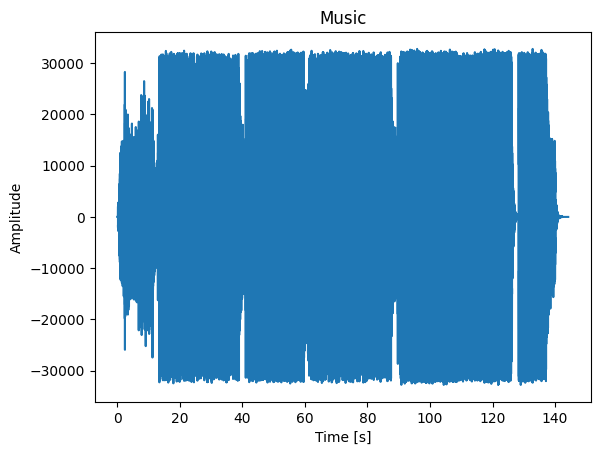

In [3]:
plt.plot(time, canal1)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Music')
plt.show()

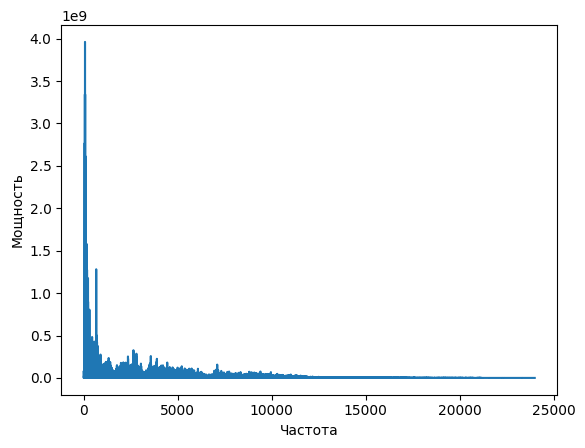

In [4]:
# работаем с 1м каналом

from scipy.fft import  rfft, rfftfreq, irfft


# число точек в normalized_tone
N = int(samplerate * duration)

yf = rfft(canal1)
xf = rfftfreq(N, 1 / samplerate)

plt.plot(xf, np.abs(yf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.show()

Применим:
1. Высокочастотный фильтр  (f > 880 Hz)
2. Низкочастотный фильтр    (f < 440 Hz)
3. Полосовой фильтр  (440 < f < 880 )
 

In [5]:
# Максимальная частота составляет половину частоты дискретизации
points_per_freq = len(xf) / (max(xf))

# Наши целевые частоты 
target_idx_hf = int(points_per_freq * 800)
target_idx_lf = int(points_per_freq * 400)

yf_hf = yf.copy()
yf_lf = yf.copy()
yf_bp = yf.copy()


yf_hf[:target_idx_hf] = 0

yf_lf[target_idx_lf:] = 0

yf_bp[:target_idx_lf] = 0
yf_bp[target_idx_hf:] = 0

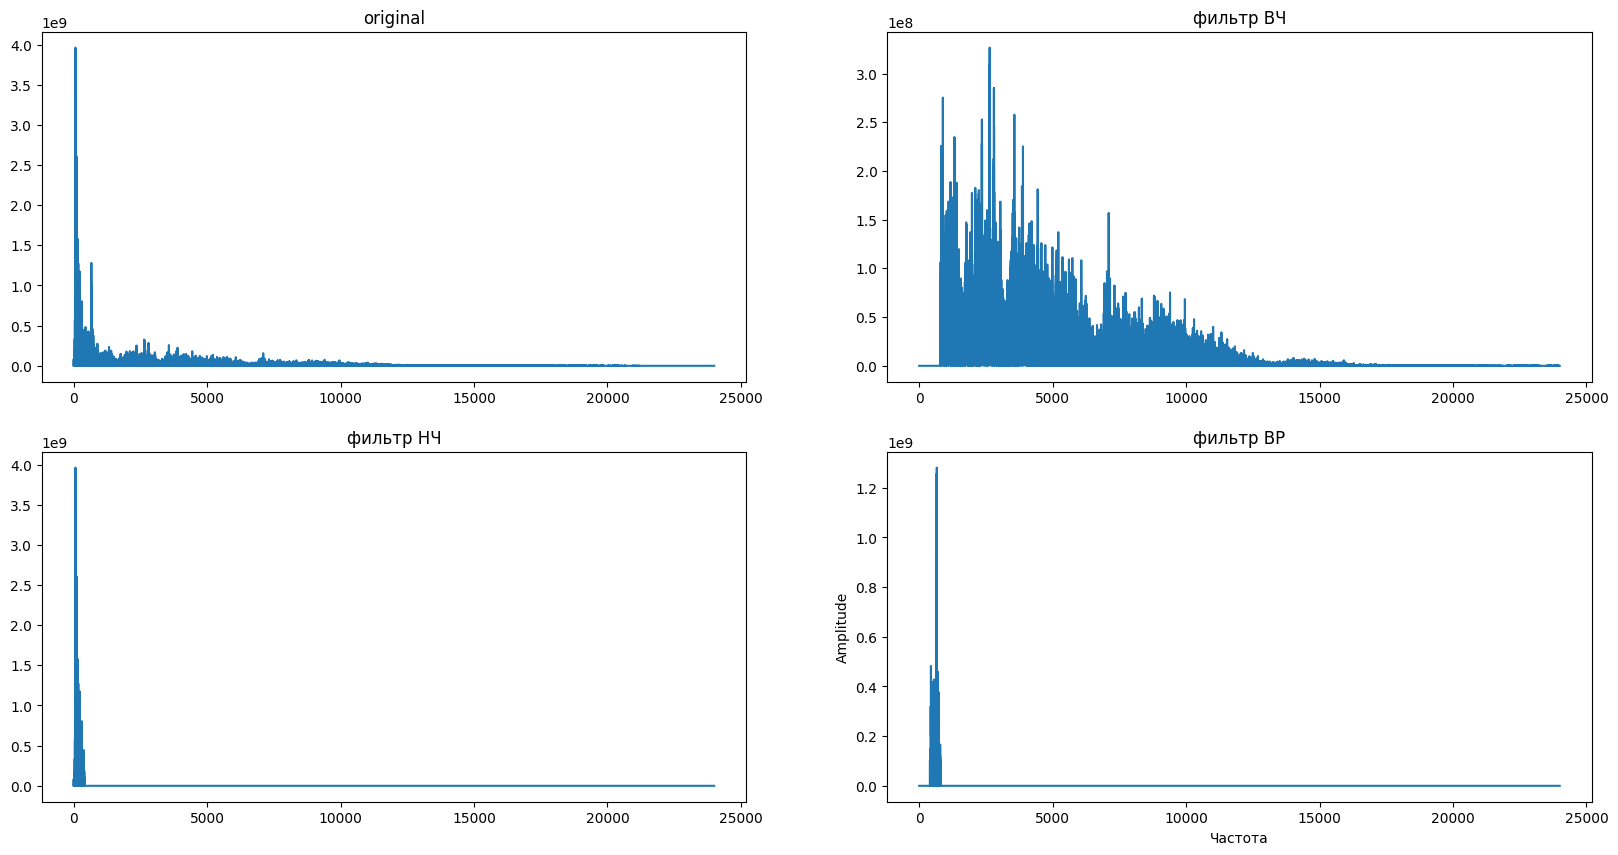

In [6]:
fig, ax = plt.subplots(nrows= 2 , ncols= 2, figsize=(20, 10) )

ax[0,0].plot(xf, np.abs(yf))
ax[0,0].set_title("original")

ax[0,1].plot(xf, np.abs(yf_hf))
ax[0,1].set_title("фильтр ВЧ")

ax[1,0].plot(xf, np.abs(yf_lf))
ax[1,0].set_title("фильтр НЧ")

ax[1,1].plot(xf, np.abs(yf_bp))
ax[1,1].set_title("фильтр BP")


plt.xlabel('Частота')
plt.ylabel('Amplitude')

plt.show()

In [7]:
new_sig_hf = irfft(yf_hf)
new_sig_lf = irfft(yf_lf)
new_sig_bp = irfft(yf_bp)


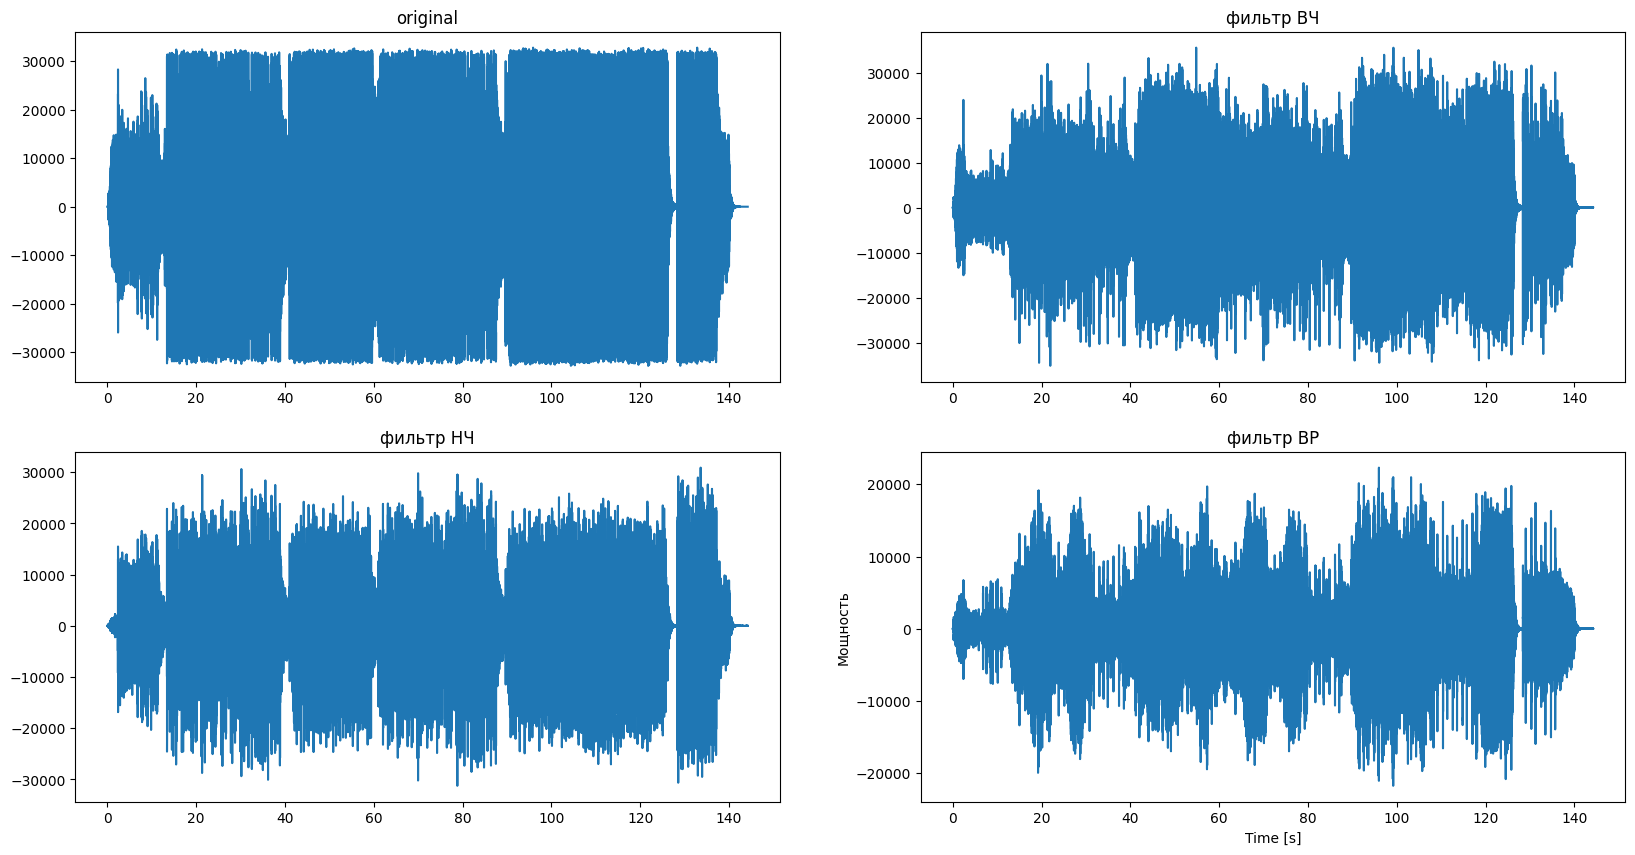

In [8]:
fig, ax = plt.subplots(nrows= 2 , ncols= 2, figsize=(20, 10) )


ax[0,0].plot(time, canal1)
ax[0,0].set_title("original")

ax[0,1].plot(time, new_sig_hf)
ax[0,1].set_title("фильтр ВЧ")

ax[1,0].plot(time, new_sig_lf)
ax[1,0].set_title("фильтр НЧ")

ax[1,1].plot(time, new_sig_bp)
ax[1,1].set_title("фильтр BP")


plt.xlabel('Time [s]')
plt.ylabel('Мощность')

plt.show()

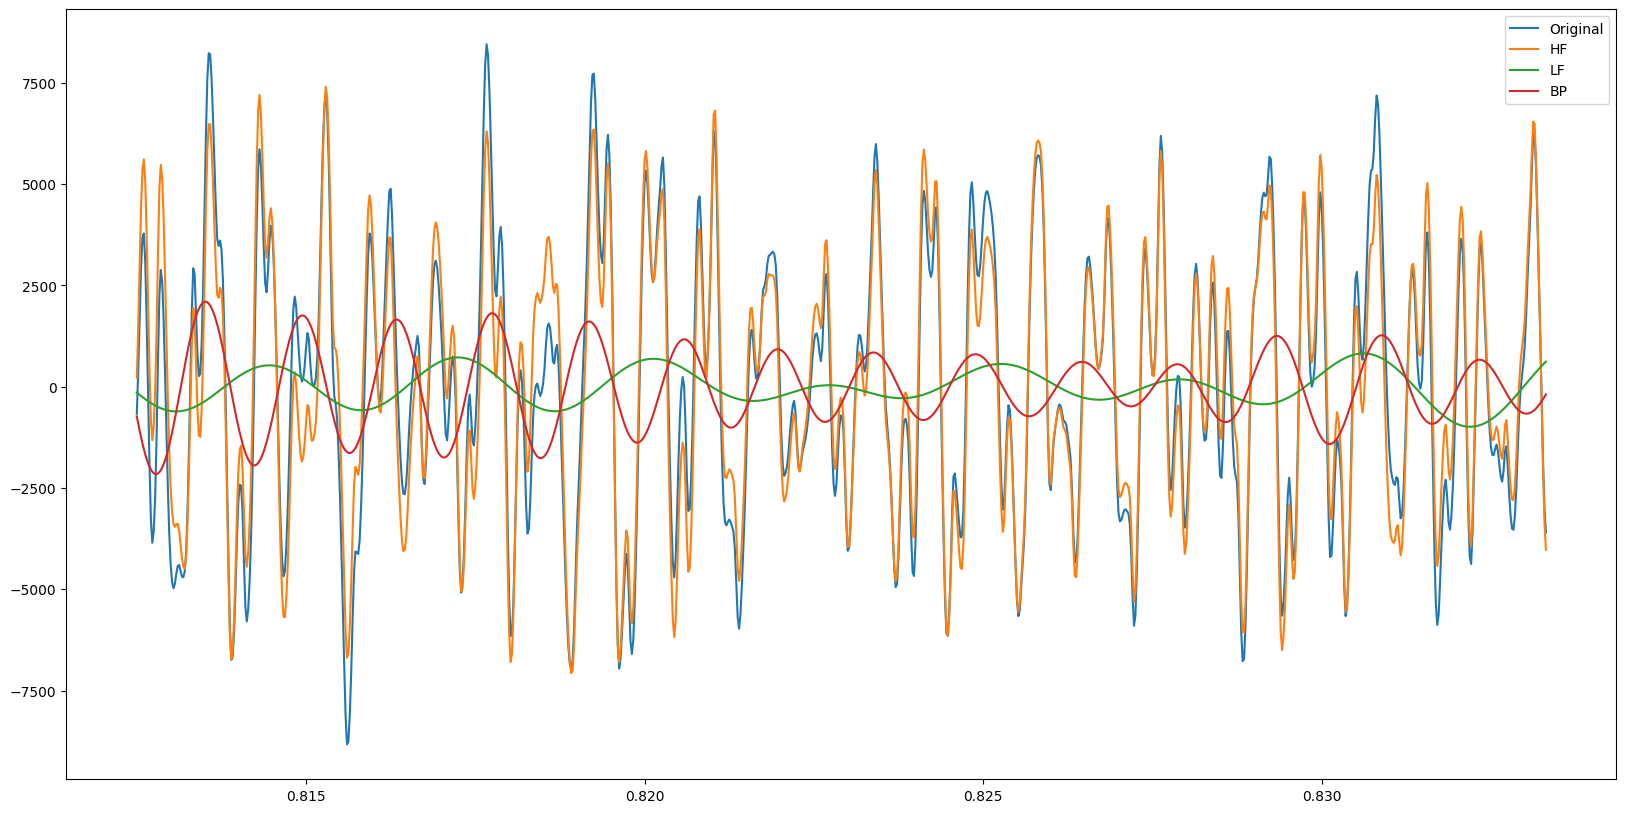

In [9]:
fig, ax = plt.subplots( figsize=(20, 10) )


original , = ax.plot(time[39000:40000], canal1[39000:40000], label='Original')
signal_hf , = ax.plot(time[39000:40000], new_sig_hf[39000:40000], label='HF')
signal_lf , = ax.plot(time[39000:40000], new_sig_lf[39000:40000], label='LF')
signal_bp , = ax.plot(time[39000:40000], new_sig_bp[39000:40000], label='BP')


ax.legend(handles=[original, signal_hf, signal_lf, signal_bp])

plt.show()

In [9]:
# слушаем, что получилось
sd.play(canal1, samplerate)

In [12]:
# слушаем, что получилось
sd.play(new_sig_hf, samplerate)
 

In [11]:
# слушаем, что получилось
sd.play(new_sig_lf, samplerate, blocking = False)


In [13]:
# слушаем, что получилось
sd.play(new_sig_bp, samplerate)
 

In [14]:
sd.stop()

# Экспоненциальное сглаживание


#### Экспоненциальное сглаживание

В основе экспоненциального сглаживания лежит расчет экспоненциальных средних, которые рассчитываются по рекуррентной формуле:
$u_t = a x_t + b u_{t-1}$
где $u_{t}$ – значение экспоненциальной средней в момент t,
$a$ – параметр сглаживания (вес последнего наблюдения), 0 < a <1,
$b = 1 – a$.

Реккурентную формулу можно представить в виде ряда:
$u_t = a \sum\limits_{j=0}^{t-1}{b^{j}x_{t-j}} + b^{t}u_{0} $

$t$ – количество точек для расчета сглаживания
$u_0$ – некоторая величина, характеризующая начальные условия при t = 1. В качестве $u_0$ можно использовать первое значение временного ряда, т. е. $x_1$.

Так как $b < 1$, то при $t \rightarrow\infty:$    $b^t \rightarrow 0$, $\sum\limits_{j=0}^{t-1}{b^{j}} \rightarrow{1}$

Таким образом, величина $u_t$ является взвешенной суммой всех уровней ряда, причем веса
уменьшаются экспоненциально, по мере углубления в историю процесса, отсюда название –
экспоненциальная средняя.

Экспоненциальная средняя имеет то же математическое ожидание, что и исходный временной ряд, но меньшую дисперсию.

Дисперсия экспоненциальной средней находится по формуле:

${{\sigma}_u}^2 = \frac{a{\sigma}^2}{2 - a } $

##### Выбор параметра сглаживания $a$
Чем ближе a к единице, тем менее ощутимо расхождение между сглаженным рядом и исходным.
И наоборот, чем меньше a, тем в большей степени подавляются случайные колебания ряда и отчетливее вырисовывается его тенденция.

***Экспоненциальное сглаживание можно представить в виде фильтра, на вход которого
поступают значения исходного временного рядя, а на выходе формируется экспоненциальная
средняя***



In [10]:
def exponential_smoothing(values, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [values[0], values[1]]  # first value is same as series
    
    for n in range(1, len(values)):
        result.append(alpha * result[n] + (1 - alpha) * values[n-1])
    
    return result

In [11]:
def plot_exponential_smoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas

        series - dataset with timestamps
        alphas - list of floats, smoothing parameters

    """
    with plt.style.context("seaborn-v0_8-white"):
        

        plt.figure(figsize=(15, 7))

        plt.plot(series[1], "c", label="Actual")

        for alpha in alphas:
            plt.plot(
                exponential_smoothing(series[1], alpha), label="Alpha {}".format(alpha)
            )

      
        plt.legend(loc="best")
        plt.axis("tight")
        plt.title("Exponential Smoothing")
        plt.grid(True)

In [12]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


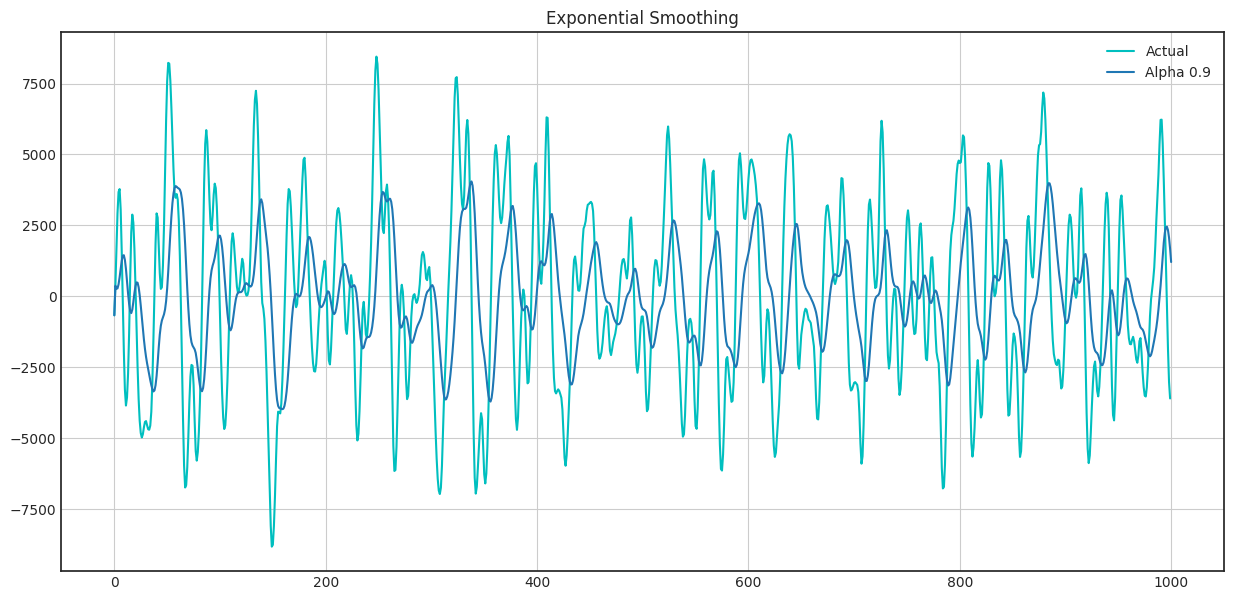

In [13]:
signal_part = canal1[39000:40000]
time_part = time[39000:40000]
 
series = pd.Series([time[39000:40000],canal1[39000:40000]])  

plot_exponential_smoothing(series, alphas=[0.9])

### Двойное экспоненциальное сглаживание

До сих пор мы могли получить от наших методов в лучшем случае прогноз лишь на одну точку вперёд (и ещё красиво сгладить ряд), это здорово, но недостаточно, поэтому переходим к расширению экспоненциального сглаживания, которое позволит строить прогноз сразу на две точки вперед (и тоже красиво сглаживать ряд).


В этом нам поможет разбиение ряда на две составляющие — уровень (level, intercept) $\ell$ и тренд $b$ (trend, slope). Уровень, или ожидаемое значение ряда, мы предсказывали при помощи предыдущих методов, а теперь такое же экспоненциальное сглаживание применим к тренду, наивно или не очень полагая, что будущее направление изменения ряда зависит от взвешенных предыдущих изменений.


$ \ell_x = \alpha y_x + (1-\alpha)(\ell_{x-1} + b_{x-1})\\ b_x = \beta(\ell_x - \ell_{x-1}) + (1-\beta)b_{x-1}\\ \hat{y}_{x+1} = \ell_x + b_x $


В результате получаем набор функций. Первая описывает уровень — он, как и прежде, зависит от текущего значения ряда, а второе слагаемое теперь разбивается на предыдущее значение уровня и тренда. Вторая отвечает за тренд — он зависит от изменения уровня на текущем шаге, и от предыдущего значения тренда. Здесь в роли веса в экспоненциальном сглаживании выступает коэффициент $\beta$. Наконец, итоговое предсказание представляет собой сумму модельных значений уровня и тренда.

Теперь настраивать пришлось уже два параметра — $\alpha$ и $\beta$. Первый отвечает за сглаживание ряда вокруг тренда, второй — за сглаживание самого тренда. Чем выше значения, тем больший вес будет отдаваться последним наблюдениям и тем менее сглаженным окажется модельный ряд. Комбинации параметров могут выдавать достаточно причудливые результаты, особенно если задавать их руками. А о не ручном подборе параметров расскажу чуть ниже, сразу после тройного экспоненциального сглаживания.

In [14]:
def double_exponential_smoothing(values, alpha, beta):
    result = [values[0]]
    for n in range(1, len(values)+1):
        if n == 1:
            level, trend = values[0], values[1] - values[0]
        if n >= len(values): # прогнозируем
            value = values[-1]
        else:
            value = values[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

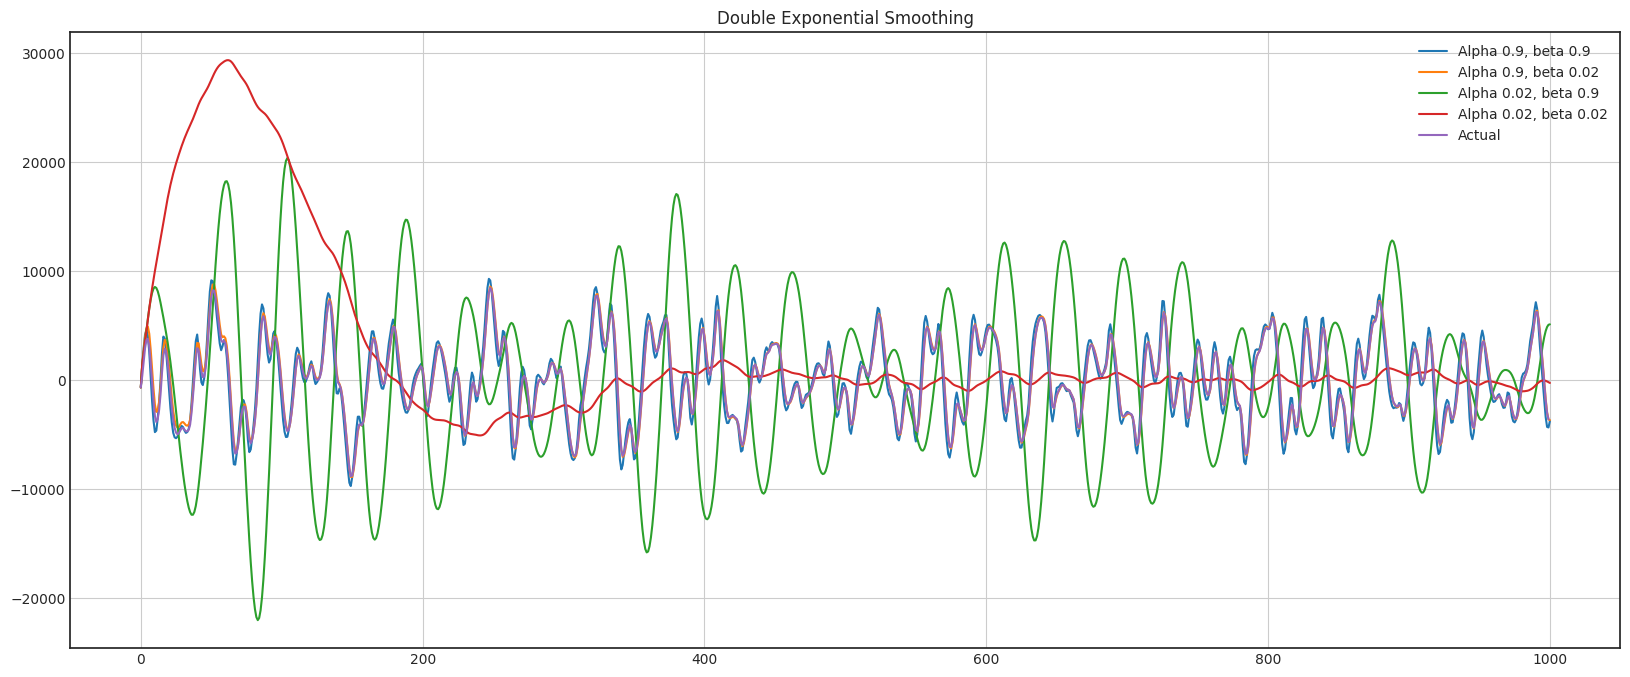

In [15]:
with plt.style.context('seaborn-v0_8-white'):
    plt.figure(figsize=(20, 8))
    for alpha in [0.9, 0.02]:
        for beta in [0.9, 0.02]:
            plt.plot(double_exponential_smoothing(signal_part, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(signal_part, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

### Тройное экспоненциальное сглаживание a.k.a. Holt-Winters

Итак, успешно добрались до следующего варианта экспоненциального сглаживания, на сей раз тройного.


Идея этого метода заключается в добавлении еще одной, третьей, компоненты — сезонности. Соответственно, метод применим только в случае, если ряд этой сезонностью не обделён, что в нашем случае верно. Сезонная компонента в модели будет объяснять повторяющиеся колебания вокруг уровня и тренда, а характеризоваться она будет длиной сезона — периодом, после которого начинаются повторения колебаний. Для каждого наблюдения в сезоне формируется своя компонента, например, если длина сезона составляет 7 (например, недельная сезонность), то получим 7 сезонных компонент, по штуке на каждый из дней недели.


Получаем новую систему:


$ \ell_x = \alpha(y_x - s_{x-L}) + (1-\alpha)(\ell_{x-1} + b_{x-1})\\ b_x = \beta(\ell_x - \ell_{x-1}) + (1-\beta)b_{x-1}\\ s_x = \gamma(y_x - \ell_x) + (1-\gamma)s_{x-L}\\ \hat{y}_{x+m} = \ell_x + mb_x + s_{x-L+1+(m-1)modL} $


Уровень теперь зависит от текущего значения ряда за вычетом соответствующей сезонной компоненты, тренд остаётся без изменений, а сезонная компонента зависит от текущего значения ряда за вычетом уровня и от предыдущего значения компоненты. При этом компоненты сглаживаются через все доступные сезоны, например, если это компонента, отвечающая за понедельник, то и усредняться она будет только с другими понедельниками. Подробнее про работу усреднений и оценку начальных значений тренда и сезонных компонент можно почитать здесь. Теперь, имея сезонную компоненту, мы можем предсказывать уже не на один, и даже не на два, а на произвольные $m$ шагов вперёд, что не может не радовать.


Ниже приведен код для построения модели тройного экспоненциального сглаживания, также известного по фамилиям её создателей — Чарльза Хольта и его студента Питера Винтерса.
Дополнительно в модель включен метод Брутлага для построения доверительных интервалов:


$ \hat y_{max_x}=\ell_{x−1}+b_{x−1}+s_{x−T}+m⋅d_{t−T}\\ \hat y_{min_x}=\ell_{x−1}+b_{x−1}+s_{x−T}-m⋅d_{t−T}\\ d_t=\gamma∣y_t−\hat y_t∣+(1−\gamma)d_{t−T}, $


где $T$ — длина сезона, $d$ — предсказанное отклонение, а остальные параметры берутся из тройного сглаживани.

In [107]:
# вспомогательная функция, рассчитываем тренд

def initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen

In [108]:
# рассчитываем сезонные компоненты

def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series) / slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen * j:slen * j + slen]) / float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen * j + i] - season_averages[j]
        seasonals[i] = sum_of_vals_over_avg / n_seasons
    return seasonals

In [109]:
# ну и само сглаживание и предсказание

def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

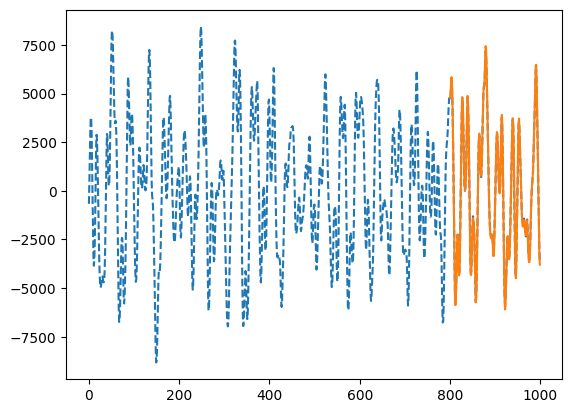

In [121]:
# предсказываем следующие 50 точек
count = 200
ind = len(signal_part) - count
vals = triple_exponential_smoothing(signal_part, 12, 0.716, 0.029, 0.993, count)
# вырезаем отрезок по x, чтобы посмотреть
x = range(ind + count)
x_pr = range(ind, ind + count)
# отрисовываем. Сплошная линия - предсказание.
plt.plot(x[:], signal_part[:], linestyle='dashed')
plt.plot(x_pr, vals[ind:ind+count])

## IIR - фильтры и преобразование Лапласа

БИХ-фильтр означает бесконечную импульсную характеристику. Такие фильтры имеют обратную связь, поэтому сигналы обрабатываются рекурсивно. Мы увидим, что импульсные характеристики экспоненты можно легко реализовать как рекурсивный фильтр.

Рассмотрим преобразованием Лапласа, которое ипользуется для причинных систем вместо преобразования Фурье.

Причинная система (англ. causal system) — в теории систем динамическая система, для которой выполняется принцип причинности, то есть выход такой системы y(t) в какой-то определённый момент времени t0 зависит только от значений входного сигнала x(t) в моменты времени t меньше или равным моменту t0.

Преобразование Фурье не подходит для причинных систем, поскольку для него требуется весь сигнал из $-\infty < t < +\infty$.

Преобразование Лапласа имеет вид:
$ 
LT(h(t)) = H(s) = \int_{0}^{\infty} h(t)e^{(-st)} \,dt\ $


$h(t)$ - оригинал в преобразовании Лапласа

$H(s)$ - изображением функции $h(t)$ 


### Обратное преобразование Лапласа

Обратным преобразованием Лапласа  комплексного переменного $F(s)$ называется функция $f(t)$ вещественной переменной, такая что:

$f(t)=\mathcal{L}^{-1}\{F(s)\}=\frac{1}{2\pi i} \lim_{\omega \rightarrow \infty} \int\limits_{\sigma_1-i \omega}^{\sigma_1+i \omega} e^{st}F(s)\,ds,$

где $\sigma_1\ $ — некоторое вещественное число




Преобразование Лапласа имеет очень важные свойства.
1. Интегрируемость

$ \int f(t)\,dt\ = \frac{1}{s}F(s)$

2. Дифференцируемость

$ \frac{d}{dt}f(t) = sF(s) $

3. Сдвиг

$f(t-T) = e^{-Ts}F(s)$

4. Свертка

$ f(t)*g(t) = F(s)G(s)$


## Дискретное преобразование Лапласа 
Применяется в сфере систем компьютерного управления. Дискретное преобразование Лапласа может быть применено для решётчатых функций.

Различают $D\ $-преобразование и $Z\ $-преобразование.
### $D\ $-преобразование
Пусть $x_d(t)=\sum\limits_{n=0}^\infty x(nT)\cdot\delta(t-nT)$ — решётчатая функция, то есть значения этой функции определены только в дискретные моменты времени $nT\ $, где $n\ $ — целое число, а $T\ $ — период дискретизации.

Тогда, применяя преобразование Лапласа, получим:

$\mathcal{D}\{x_d(t)\}=\sum\limits_{n=0}^\infty x(nT)\cdot e^{-snT}.$


### $Z\ $-преобразование
Если применить следующую замену переменных:
$z=e^{sT},$
получим $Z$-преобразование:

$\mathcal{Z}\{x_d(t)\}=\sum\limits_{n=0}^\infty x(nT)\cdot z^{-n}.$





В качестве обучающего примера мы возьмем очень простой аналоговый фильтр и протестируем его. Затем это можно распространить на более сложные ситуации.
Определим фильтр первого порядка

$h(t) = e^{(-bt)}$

Преобразование Лапласа для него представляет собой простую дробь:

$ H(s) = \frac{1}{s+b}$


Переходим к решетчатой функции

$h(t)=\sum\limits_{n=0}^\infty e^{-bnT}\cdot\delta(t-nT)$

Подставляя в преобразование Лапласа:

$H(s)=\sum\limits_{n=0}^\infty e^{-bnT}\cdot e^{-nsT} = \sum\limits_{n=0}^\infty e^{-bnT}\cdot z^{-1n} = 
\sum\limits_{n=0}^\infty (e^{-bT}\cdot z^{-1})^n = \frac{1}{1 - e^{-bT}z^{-1}}$

Следовательно, аналоговая передаточная функция $H(s)$ переходит в $H(z)$ по следующему рецепту:

$
\displaystyle H(s)=\frac{1}{s+b} \qquad\Leftrightarrow\qquad
H(z)=\frac{1}{1-e^{-bT} z^{-1}}
$

Еще пример.

$H(s)=s$ превращается в $H(z)=1-z^{-1}e^{0T}=1-z^{-1}$, который по сути представляет собой фильтр постоянного тока.


## Популярные аналоговые передаточные функции, используемые при разработке БИХ-фильтра:


**Баттерворта** 

Фильтр Баттерворта на сегодняшний день является самым популярным фильтром. Вот его свойства:
монотонная частотная характеристика
только полюса, никаких нулей
есть аналитическое решение для полюсов и его очень легко посчитать

**Фильтры Чебышева**

   $\displaystyle \vert H(\Omega)\vert^{2} = \frac{1}{1 - \varepsilon^{2} T_{N} (\Omega/\Omega_{p})}
$

где T = полиномы Чебышева. Эти фильтры имеют либо пульсации в полосе пропускания, либо в задержке, в зависимости от выбора полиномов. Как и в случае с Баттервортом, полиномы имеют аналитические решения для полюсов и нулей фильтра, так что их конструкция снова проста.


**Фильтр** **Бесселя**

Постоянная групповая задержка
Неглубокий переход от полосы остановки к полосе пропускания
Нет аналитического решения для полюсов/нулей.

Как преобразовать аналоговые фильтры нижних частот в фильтры верхних частот, полосовые или полосовые фильтры?


Все вышеперечисленные аналоговые передаточные функции представляют собой фильтры нижних частот. Однако это не является ограничением, поскольку существуют удобные преобразования, которые принимают аналоговую передаточную функцию нижних частот или полюсы/нули, а затем преобразуют их в фильтры верхних частот, полосовые фильтры и фильтры полосы задерживания. 

Если есть необходимость в обработке аналоговых сигналов, то эти правила можно найти в любой хорошей книге по проектированию аналоговых фильтров.

## Билинейное преобразование: преобразование аналоговой передаточной функции в цифровую.



На следующем этапе эти аналоговые передаточные функции $H(s)$ необходимо преобразовать в цифровые передаточные функции $H(z)$. Это можно сделать с помощью согласованного z-преобразования. 

Однако проблема этих методов заключается в том, что они отображают частоты 1:1 между цифровой и аналоговой областью. 

Вспомните: в выборочной области нет бесконечной частоты, но есть $F_s/2$, которая является частотой Найквиста. Это означает, что мы никогда не получим большего демпфирования, чем у Найквиста $F_s/2$. Это проблема для фильтров нижних частот, где затухание увеличивается с увеличением частоты.


Решение состоит в том, чтобы сопоставить все аналоговые частоты от $0\ldots\infty$ с дискретизированными частотами $0\ldots 0.5$ нелинейным способом:

   $\displaystyle - \infty < \Omega < \infty \Rightarrow -\pi \leq \omega \leq \pi
$ 


Это называется билинейным преобразованием:
   $\displaystyle s = \frac{2}{T} \quad \frac{z - 1}{z + 1}
$ 


Это правило заменяет все $s$ на $z$ в нашей аналоговой передаточной функции, и теперь она становится цифровой. Однако частота среза $\Omega_c$ по-прежнему является аналоговой, но если мы хотим спроектировать цифровой фильтр, нам нужно указать цифровую частоту среза. Кроме того, отображение частот является нелинейным, поэтому существует нелинейное отображение и среза.


В аналоговой области частота задается как $s = j\Omega$, а в дискретной области как $z = e^{j \omega}$. Определив билинейное преобразование, мы можем установить, как сопоставить желаемую цифровую границу с аналоговой:

   $\displaystyle j \Omega = \frac{2}{T} \left[\frac{e^{j \omega} - 1}{e^{j \omega} +1}\right] = \frac{2 }{T} j \tan \frac{\omega}{2}
$ 


Этот вывод полезен для двух целей. Он показывает нелинейное сопоставление между цифровым и аналоговым миром и дает рецепт, как рассчитать граничную частоту аналогового сигнала.


То, что билинейное преобразование представляет собой нелинейное отображение между аналоговым и цифровым миром, можно непосредственно увидеть, просто опустив $j$:

   $\displaystyle \Omega = \frac{2}{T} tan \frac{\omega}{2}
$ 


Это также означает, что частота среза нашего аналогового фильтра изменяется в результате билинейного преобразования. Следовательно, нам нужно применить то же преобразование к самой частоте среза:

   $\displaystyle \Omega_{c} = \frac{2}{T} tan \frac {\omega_{c}}{2}
$

где $T$ — интервал выборки. Это часто называют «предварительным искажением», но это просто применение того же правила к частоте среза, что и то, что билинейное преобразование делает к передаточной функции $H(s)$. Это также дает еще один важный результат: теперь мы можем, наконец, указать нашу обрезку в области выборки в нормализованных частотах $\omega_{c} = 2\pi f_{c}$. В конце концов, мы просто используем аналоговый фильтр как средство для разработки цифрового фильтра.
Теперь мы можем перечислить этапы проектирования.


Этапы проектирования БИХ-фильтра:
1. Выберите частоту среза вашего цифрового фильтра $\omega_{c}$.
1. Вычислите граничную частоту аналогового сигнала $\omega_{c} \rightarrow
\Omega_{c}$ 
1. Выберите свой любимый аналоговый фильтр нижних частот $H(s)$, например Баттерворта.
1. Замените все $s$ в аналоговой передаточной функции $H(s)$ на $s = \frac{2}{T} \frac{z - 1}{z + 1}$, чтобы получить цифровой фильтр $H(z )$
1. Измените передаточную функцию $H(z)$ так, чтобы она содержала только отрицательные степени $z$ ( $z^{-1}, z^{-2}, \ldots$), которые можно интерпретировать как линии задержки.
1. Создайте свой БИХ-фильтр!


Для порядков фильтра выше двух необходимо разработать другую стратегию, потому что билинейное преобразование очень сложно вычислить для чего-либо выше порядка двух. Никто не хочет преобразовывать аналоговые передаточные функции высокого порядка $H(s)$ в область $H(z)$.

Однако у всех аналоговых передаточных функций есть важное свойство: они генерируют комплексно-сопряженные пары полюсов (плюс один действительный полюс, если нечетного порядка), что сразу предполагает цепочку БИХ-фильтров 2-го порядка. Помните, что комплексно-сопряженная пара полюсов создает БИХ-фильтр 2-го порядка с двумя ступенями задержки. 

Реальный полюс — это БИХ-фильтр 1-го порядка с одной задержкой, но часто он также реализуется как фильтр 2-го порядка, в котором коэффициенты 2-й задержки поддерживаются нулевыми.

Таким образом, стратегия проектирования состоит в том, чтобы разбить аналоговую передаточную функцию $H(s)$ на цепочку фильтров 2-го порядка $H(s) = H_1(s) H_2(s) H_3(s) \ldots$, а затем применить билинейное преобразование к каждому члену 2-го порядка отдельно. 

Используя эту стратегию, вам нужно вычислить билинейное преобразование только один раз для системы 2-го порядка (или, если порядок нечетный, то и для системы 1-го порядка), но тогда нет необходимости делать более мучительные билинейные преобразования. Это стандартная практика при проектировании БИХ-фильтров.

Временная или частотная область?


Преобразования из аналогового в цифровой видоизменяют как временную характеристику, так и частотную характеристику. Однако разные преобразования имеют разное влияние. 

Билинейное преобразование гарантирует, что цифровой фильтр использует весь частотный диапазон аналогового фильтра от нуля до бесконечности, что является лучшим решением проблем в частотной области. 

Однако, если необходимо максимально точно воспроизвести временной отклик аналогового фильтра, то лучше всего использовать согласованное z-преобразование, поскольку оно основано (как следует из названия) на методе импульсной инвариантности, целью которого является сохранение временного поведения фильтра (точное для передаточных функций только для полюсов).

1. Требуется идентичная частотная характеристика: билинейное преобразование
1. Требуется идентичное временное поведение: согласованное z-преобразование.

Конечно, 100% совпадения не будет достигнуто, но на практике это допустимо. В большинстве случаев билинейное 
преобразование является предпочтительным преобразованием. Согласованное z-преобразование может быть очень полезным, например, в робототехнике, где важно время.

## Фильтры в Python

scipy.signal


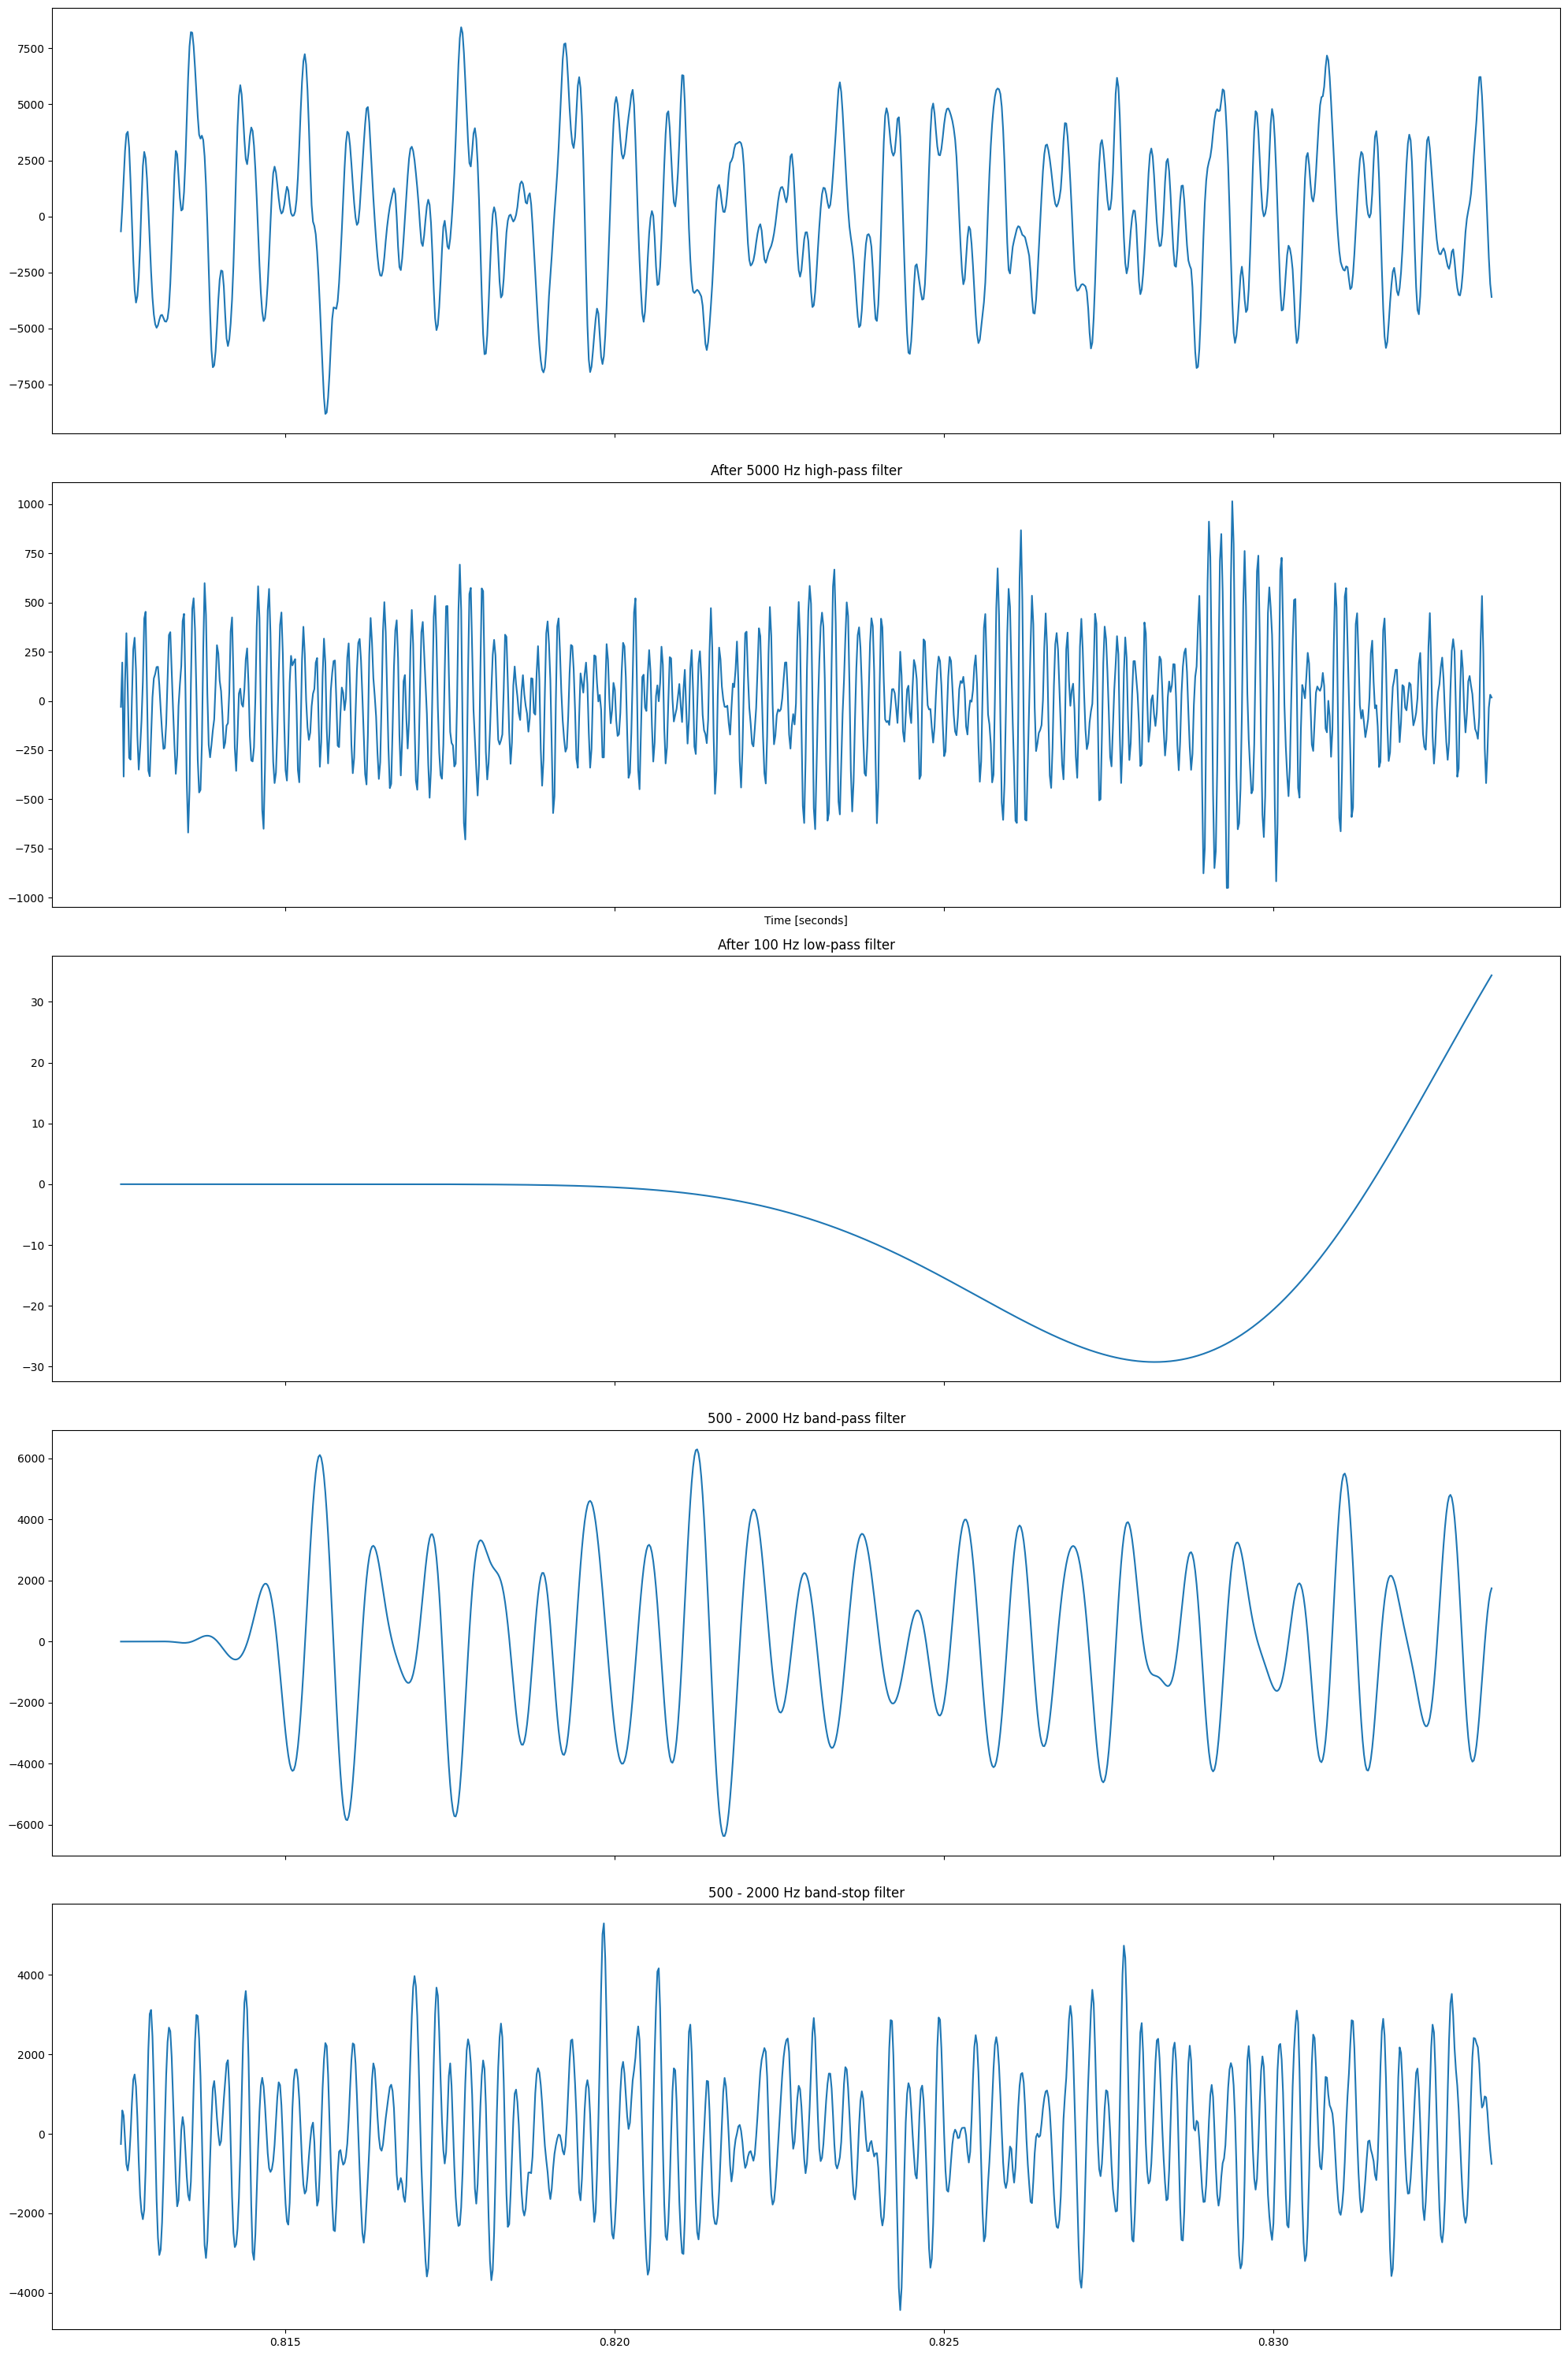

In [30]:

# high pass
sos_hp = signal.cheby1(10, 1, 5000, 'hp', fs=samplerate, output='sos')
filtered_hp = signal.sosfilt(sos_hp, signal_part)


# low pass
sos_lp = signal.cheby1(10, 1, 100, 'lp', fs=samplerate, output='sos')
filtered_lp = signal.sosfilt(sos_lp, signal_part)


# band pass
sos_bp = signal.cheby1(10, 1, [500, 2000], 'bp', fs=samplerate, output='sos')
filtered_bp = signal.sosfilt(sos_bp, signal_part)

# band pass
sos_bs = signal.cheby1(10, 1, [500, 2000], 'bs', fs=samplerate, output='sos')
filtered_bs = signal.sosfilt(sos_bs, signal_part)


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex=True, figsize=(20,30))
ax1.plot(time_part, signal_part)

ax2.plot(time_part, filtered_hp)
ax2.set_title('After 5000 Hz high-pass filter')

ax3.plot(time_part, filtered_lp)
ax3.set_title('After 100 Hz low-pass filter')

ax4.plot(time_part, filtered_bp)
ax4.set_title('500 - 2000 Hz band-pass filter')
 
ax5.plot(time_part, filtered_bs)
ax5.set_title('500 - 2000 Hz band-stop filter')

ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

In [18]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

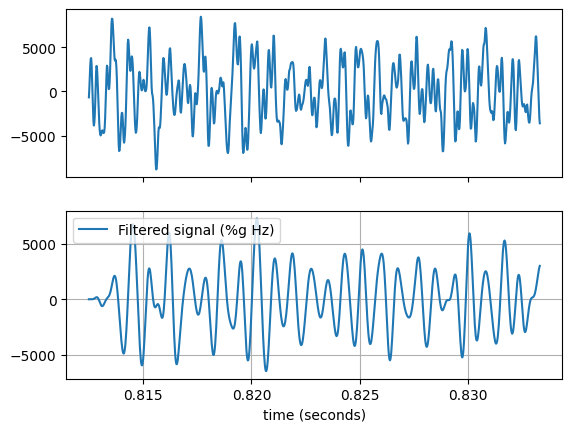

In [24]:
from scipy.signal import butter, lfilter

# Sample rate and desired cutoff frequencies (in Hz).
fs = samplerate

lowcut = 500.0
highcut = 2000.0


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(time_part, signal_part, label='Noisy signal')

y = butter_bandpass_filter(signal_part, lowcut, highcut, fs, order=6)
ax2.plot(time_part, y, label='Filtered signal (%g Hz)')

plt.xlabel('time (seconds)')
 
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()